<html>
    IMPORTING LIBRARIES
    </html>

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
import statsmodels.api as sm
from scipy.stats import pearsonr


In [2]:
car=pd.read_csv("C:/Users/Vedhavalli/Downloads/imports-85.data",header=None,na_values="?")
car.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [3]:
car.columns=['sym','norm','make','fuel_type','aspirat','num_of_doors','body_style','drive_wheels','engine_location','wheel_base','length','width','height','curb_weight','engine_type','cylinders','engine_size','fuel_system','bore','stroke','compression_ratio','horsepower','peak_rpm','city_mpg','highway_mpg','price']
car.norm.fillna('115.0',inplace=True)
car.num_of_doors.fillna('4',inplace=True)
car.bore.fillna('3.31',inplace=True)      #mean
car.stroke.fillna('3.29',inplace=True)    #median
car.drop(['price'],axis=1,inplace=True)   #others(since it is op)#drop the columns
car.horsepower.fillna('95.0',inplace=True)  #median
car.peak_rpm.fillna('5200.0',inplace=True)


In [4]:
car.mean()

C:\Users\VEDHAV~1\AppData\Local\Temp/ipykernel_9240/1170622532.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  car.mean()


sym                     0.834146
wheel_base             98.756585
length                174.049268
width                  65.907805
height                 53.724878
curb_weight          2555.565854
engine_size           126.907317
compression_ratio      10.142537
city_mpg               25.219512
highway_mpg            30.751220
dtype: float64

In [5]:
car.describe()

,sym,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [6]:
car.count()

sym                  205
norm                 205
make                 205
fuel_type            205
aspirat              205
num_of_doors         205
body_style           205
drive_wheels         205
engine_location      205
wheel_base           205
length               205
width                205
height               205
curb_weight          205
engine_type          205
cylinders            205
engine_size          205
fuel_system          205
bore                 205
stroke               205
compression_ratio    205
horsepower           205
peak_rpm             205
city_mpg             205
highway_mpg          205
dtype: int64

In [7]:
car.isnull().sum()

sym                  0
norm                 0
make                 0
fuel_type            0
aspirat              0
num_of_doors         0
body_style           0
drive_wheels         0
engine_location      0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_type          0
cylinders            0
engine_size          0
fuel_system          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
dtype: int64

In [8]:
car.head()

,sym,norm,make,fuel_type,aspirat,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
1,3,115.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,four,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27
2,1,115.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,six,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,four,109,mpfi,3.19,3.4,10.0,102.0,5500.0,24,30
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,five,136,mpfi,3.19,3.4,8.0,115.0,5500.0,18,22


In [9]:
car.shape

(205, 25)

In [10]:
car.size

5125

<html>
    DISTRIBUTION
    </html>

C:\Users\Vedhavalli\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


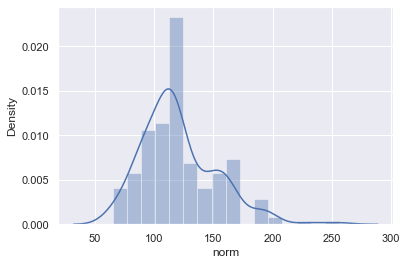

In [11]:
sns.distplot(car['norm'])
plt.show()

<html>
    HISTOGRAM
    </html>

array([[<AxesSubplot:title={'center':'sym'}>,
        <AxesSubplot:title={'center':'wheel_base'}>,
        <AxesSubplot:title={'center':'length'}>],
       [<AxesSubplot:title={'center':'width'}>,
        <AxesSubplot:title={'center':'height'}>,
        <AxesSubplot:title={'center':'curb_weight'}>],
       [<AxesSubplot:title={'center':'engine_size'}>,
        <AxesSubplot:title={'center':'compression_ratio'}>,
        <AxesSubplot:title={'center':'city_mpg'}>],
       [<AxesSubplot:title={'center':'highway_mpg'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

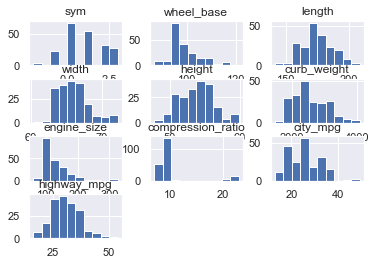

In [12]:
car.hist()

In [13]:
car.tail()

,sym,norm,make,fuel_type,aspirat,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,six,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,six,145,idi,3.01,3.4,23.0,106.0,4800.0,26,27
204,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,four,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25


<html>
    VISUALIZATION
    </html>

<AxesSubplot:xlabel='length', ylabel='width'>

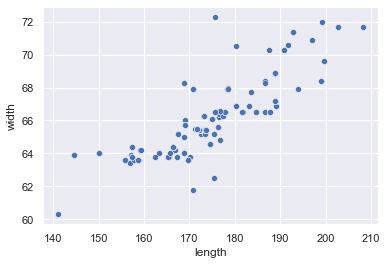

In [14]:
sns.scatterplot(x='length',y='width',data=car)


<AxesSubplot:>

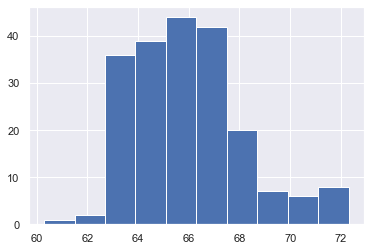

In [15]:
car.width.hist()

<AxesSubplot:>

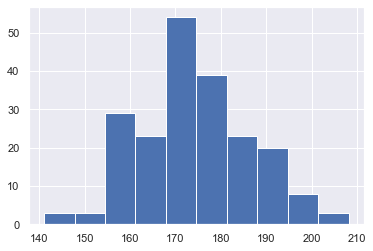

In [16]:
car.length.hist()

In [17]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sym                205 non-null    int64  
 1   norm               205 non-null    object 
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspirat            205 non-null    object 
 5   num_of_doors       205 non-null    object 
 6   body_style         205 non-null    object 
 7   drive_wheels       205 non-null    object 
 8   engine_location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine_type        205 non-null    object 
 15  cylinders          205 non-null    object 
 16  engine_size        205 non

In [18]:
car.cylinders.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [19]:
car.cylinders.isnull().sum()

0

In [20]:
car.cylinders.value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylinders, dtype: int64

<AxesSubplot:xlabel='cylinders', ylabel='count'>

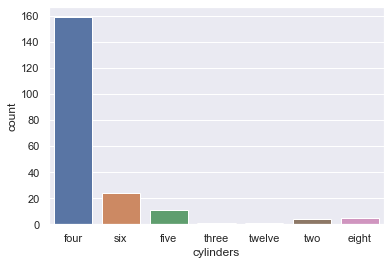

In [21]:
sns.countplot(x='cylinders', data=car)

In [22]:
car.cylinders=car.cylinders.replace(["six","five","three","four","two"],"6 and below")
car.cylinders=car.cylinders.replace(["eight","twelve"],"8 and above")


<AxesSubplot:xlabel='cylinders', ylabel='count'>

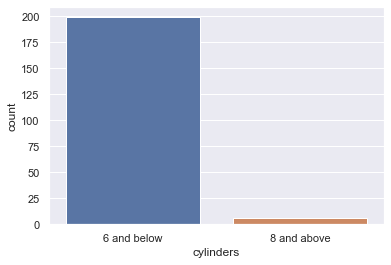

In [23]:
sns.countplot(x ="cylinders",data = car, order=["6 and below","8 and above"]) 

### sns.countplot(x='fuel_system', data=car)

In [24]:
car.fuel_system=car.fuel_system.replace(["1bbl","2bbl","4bbl"],"bbl")
car.fuel_system=car.fuel_system.replace(["mpfi","mfi","spfi"],"fi")
car.fuel_system=car.fuel_system.replace(["idi","spdi"],"di")

<AxesSubplot:xlabel='fuel_system', ylabel='count'>

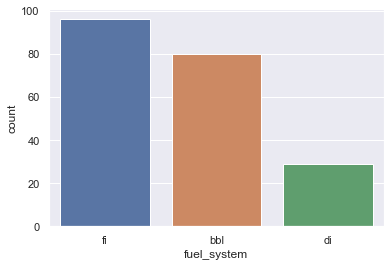

In [25]:
sns.countplot(x='fuel_system', data=car)

<AxesSubplot:xlabel='fuel_type', ylabel='count'>

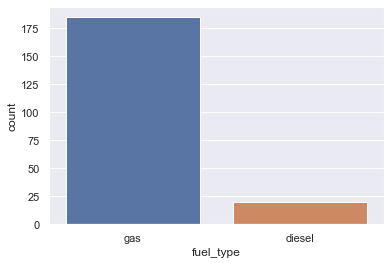

In [26]:
sns.countplot(x='fuel_type', data=car)

Text(0.5, 1.0, 'length')

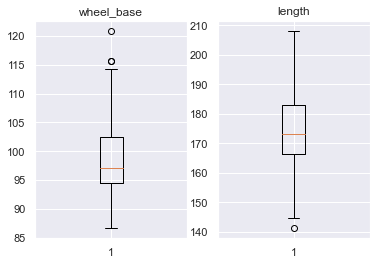

In [27]:
plt.subplot(1,2,1)
plt.boxplot(car.wheel_base)
plt.title("wheel_base")
plt.subplot(1,2,2)
plt.boxplot(car.length)
plt.title("length")


Text(0.5, 1.0, 'height')

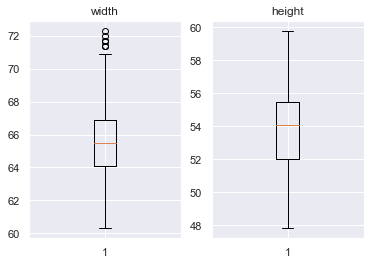

In [28]:
plt.subplot(1,2,1)
plt.boxplot(car.width)
plt.title("width")
plt.subplot(1,2,2)
plt.boxplot(car.height)
plt.title("height")

In [29]:
car.norm.median()

115.0

In [30]:

car['bore'].fillna(car['bore'].mean)


0      3.47
1      3.47
2      2.68
3      3.19
4      3.19
       ... 
200    3.78
201    3.78
202    3.58
203    3.01
204    3.78
Name: bore, Length: 205, dtype: object

<html>
To Remove Outlier
    </html>

In [34]:
Q1=car.wheel_base.quantile(0.75)
Q3=car.wheel_base.quantile(0.25)
IQR=Q3-Q1
UE=Q3+1.5*(IQR)
LE=Q1-1.5*(IQR)

In [35]:
print(UE)

82.64999999999999


In [36]:
print(LE)

114.25000000000001


<html>
  Drop Upper Extreme
</html>

In [37]:
car[(car.wheel_base < UE) & (car.wheel_base > LE)]

,sym,norm,make,fuel_type,aspirat,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg


<html>
    Replace the outlier above UE as UE
</html>

In [38]:
car.wheel_base[car.wheel_base > UE] = UE

C:\Users\VEDHAV~1\AppData\Local\Temp/ipykernel_9240/4115952334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.wheel_base[car.wheel_base > UE] = UE


<html>
    Replace the outlier below LE as LE
    </html>

In [39]:
car.wheel_base[car.wheel_base < LE] = LE

C:\Users\VEDHAV~1\AppData\Local\Temp/ipykernel_9240/1913439672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  car.wheel_base[car.wheel_base < LE] = LE


{'whiskers': [<matplotlib.lines.Line2D at 0x20ab9830250>,
 'caps': [<matplotlib.lines.Line2D at 0x20ab9830970>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ab9822e80>],
 'medians': [<matplotlib.lines.Line2D at 0x20ab983d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20ab983d460>],
 'means': []}

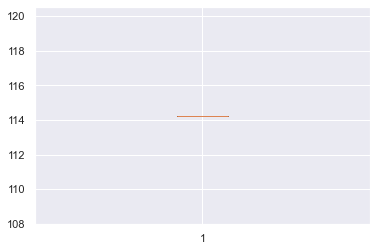

In [40]:
plt.boxplot(car.wheel_base)